In [22]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

In [23]:
label = LabelEncoder()
df = pd.read_csv('data/car/car.data', header=None)
header = ["buying","maint","doors","persons","lug_boot","safety","class"]


df.columns = header

In [24]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [25]:
for column in df.columns:
    df[column] = label.fit_transform(df[column])

In [26]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
...,...,...,...,...,...,...,...
1723,1,1,3,2,1,2,1
1724,1,1,3,2,1,0,3
1725,1,1,3,2,0,1,2
1726,1,1,3,2,0,2,1


In [27]:
type(df)

pandas.core.frame.DataFrame

In [28]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [29]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

Text(0.5, 1.0, 'car type')

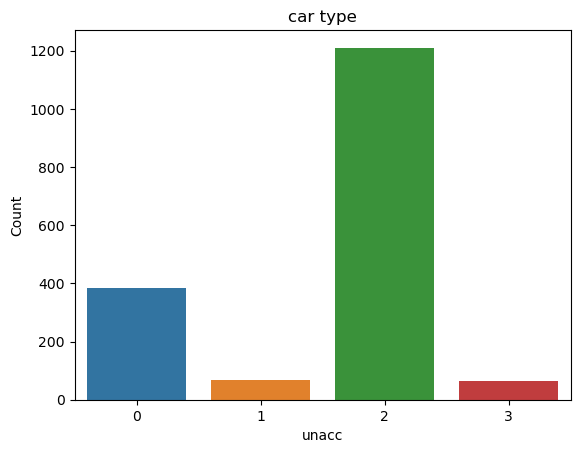

In [30]:
sns.countplot(data = df, x="class")
plt.xlabel("unacc")
plt.ylabel("Count")
plt.title("car type")

In [31]:
X = df.iloc[:,:6].values
y = df.iloc[:,-1].values

In [32]:
X

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       ...,
       [1, 1, 3, 2, 0, 1],
       [1, 1, 3, 2, 0, 2],
       [1, 1, 3, 2, 0, 0]])

In [33]:
y

array([2, 2, 2, ..., 2, 1, 3])

In [34]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [35]:
from tensorflow.python.keras.utils import np_utils

y_train = np_utils.to_categorical(y_train,4)
y_test = np_utils.to_categorical(y_test,4)

print('New y_train shape: ', y_train.shape)
print('New y_train shape: ', y_test.shape)

New y_train shape:  (1382, 4)
New y_train shape:  (346, 4)


In [36]:
y_train

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)

In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(6,input_shape=(6,),activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(24,activation='relu'))
model.add(Dense(4,activation='sigmoid'))

model.compile(Adam(learning_rate=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 12)                84        
                                                                 
 dense_6 (Dense)             (None, 24)                312       
                                                                 
 dense_7 (Dense)             (None, 4)                 100       
                                                                 
Total params: 538 (2.10 KB)
Trainable params: 538 (2.10 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/100
44/44 [==============================] - 2s 10ms/step - loss: 0.3522 - accuracy: 0.7026 - val_loss: 0.3208 - val_accuracy: 0.6705
Epoch 2/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2597 - accuracy: 0.7511 - val_loss: 0.2336 - val_accuracy: 0.7775
Epoch 3/100
44/44 [==============================] - 0s 4ms/step - loss: 0.2060 - accuracy: 0.8025 - val_loss: 0.2179 - val_accuracy: 0.7832
Epoch 4/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1865 - accuracy: 0.8205 - val_loss: 0.1877 - val_accuracy: 0.8295
Epoch 5/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1805 - accuracy: 0.8278 - val_loss: 0.1727 - val_accuracy: 0.8613
Epoch 6/100
44/44 [==============================] - 0s 4ms/step - loss: 0.1611 - accuracy: 0.8509 - val_loss: 0.1754 - val_accuracy: 0.8468
Epoch 7/100
44/44 [==============================] - 0s 3ms/step - loss: 0.1513 - accuracy: 0.8647 - val_loss: 0.1443 - val_accuracy: 0.8786
Epoch 8/100


Epoch 59/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0449 - accuracy: 0.9638 - val_loss: 0.0508 - val_accuracy: 0.9624
Epoch 60/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0459 - accuracy: 0.9616 - val_loss: 0.0660 - val_accuracy: 0.9480
Epoch 61/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9602 - val_loss: 0.1068 - val_accuracy: 0.9133
Epoch 62/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0640 - accuracy: 0.9486 - val_loss: 0.0497 - val_accuracy: 0.9653
Epoch 63/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0450 - accuracy: 0.9689 - val_loss: 0.1148 - val_accuracy: 0.8988
Epoch 64/100
44/44 [==============================] - 0s 4ms/step - loss: 0.0570 - accuracy: 0.9566 - val_loss: 0.1227 - val_accuracy: 0.9133
Epoch 65/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0724 - accuracy: 0.9421 - val_loss: 0.0761 - val_accuracy: 0.9364
Epoch 

In [39]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

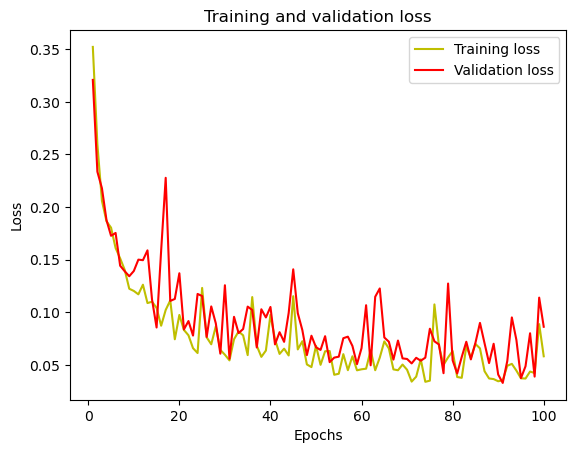

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

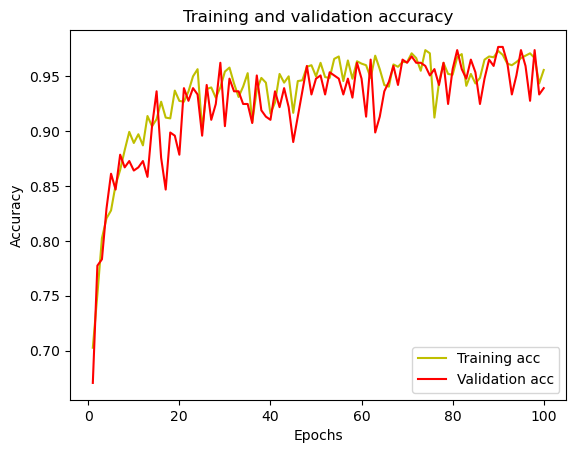

In [41]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87        79
           1       0.88      0.88      0.88        17
           2       0.96      0.98      0.97       240
           3       0.75      0.90      0.82        10

    accuracy                           0.94       346
   macro avg       0.88      0.90      0.89       346
weighted avg       0.94      0.94      0.94       346

[[ 65   2  11   1]
 [  0  15   0   2]
 [  4   0 236   0]
 [  1   0   0   9]]
